In [51]:
from functions import *
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from pathlib import Path

import pingouin as pg
import seaborn as sns


In [53]:
psyFull = pd.read_csv('./psychopy/psyFull.csv')

In [54]:
psyFull.participant.nunique()

44

# Figure 1D

In [55]:
memErrSubjBri = psyFull[['participant','rt','correctness','cuedItemBri']].groupby(['participant','cuedItemBri']).mean().reset_index()
memErrSubjBri['correctness'] = memErrSubjBri['correctness'] *100

C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1413206796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1413206796.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1413206796.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1413206796.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 15}` instead.

  sns.pointplot(


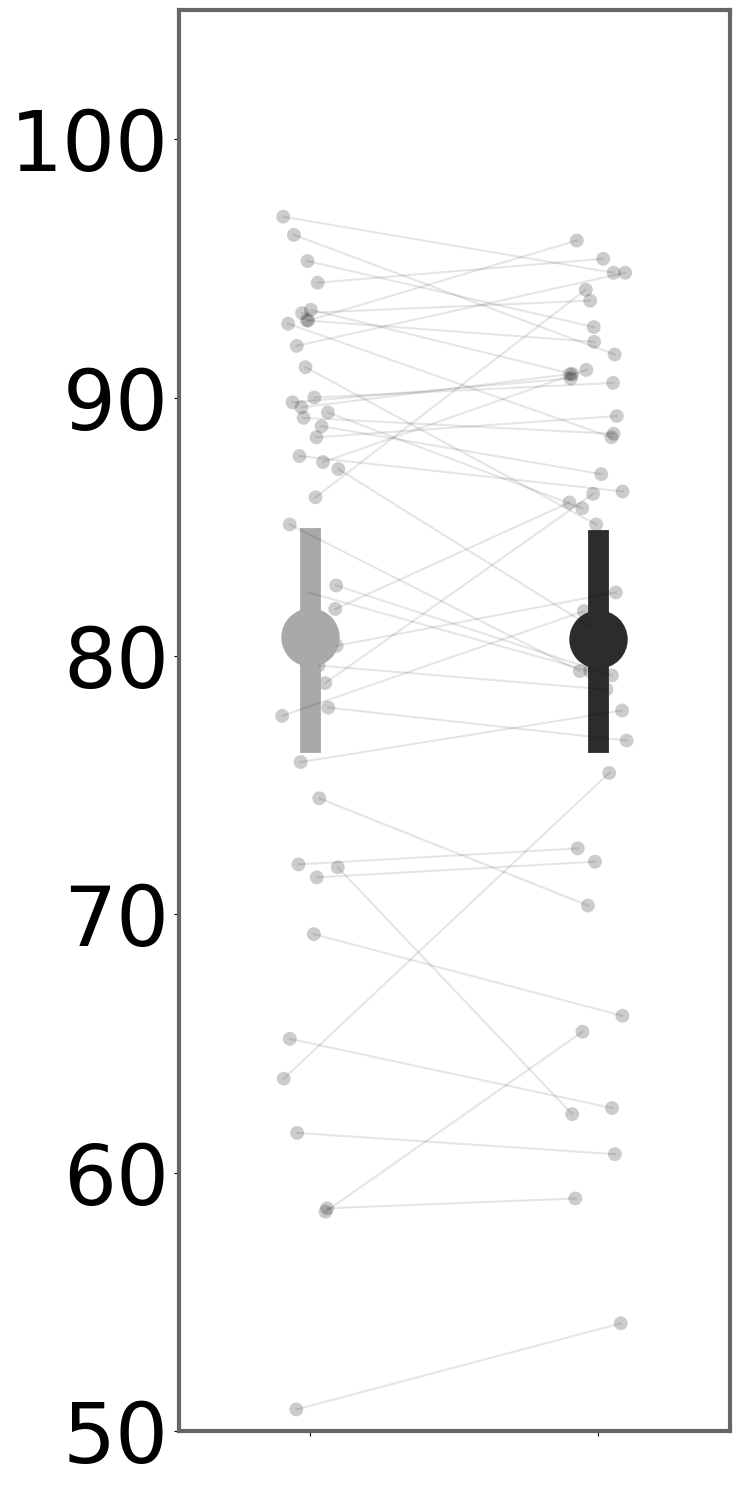

In [56]:
fs(7.5,15)
fig,ax = plt.subplots()
sns.stripplot(
    data=memErrSubjBri, 
    y = 'correctness', x = 'cuedItemBri',
    palette=['black'], order = ['day','night'], 
    alpha=.2, legend=False,size=10, zorder = 1,
)

sns.pointplot(
    data=memErrSubjBri, 
    y = 'correctness', x = 'cuedItemBri',palette=['#a9a9a9','#2c2c2c'],
    order = ['day','night'], 
   legend=False,linestyles='none',errwidth= 15,markersize=40,
)

locs1 = ax.get_children()[0].get_offsets().data
locs2 = ax.get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color="black", alpha=0.1)

plt.ylim(50,105)

plt.tick_params(axis='y', which='major', labelsize=60)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel('',c = 'white')
plt.ylabel('',c = 'white')

plt.xticks(c = 'white');


ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.spines['right'].set_color('#666666')
ax.spines['top'].set_color('#666666')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.margins(y=0.1,x = 0.3)

plt.tight_layout();

In [59]:
day_correct = memErrSubjBri[memErrSubjBri.cuedItemBri == 'day'].correctness
night_correct = memErrSubjBri[memErrSubjBri.cuedItemBri == 'night'].correctness

ttest_result = stats.ttest_rel(day_correct, night_correct, nan_policy='omit')
cohen_d_value = round(cohenD(day_correct, night_correct), 2)

t_value = ttest_result.statistic
bf = pg.bayesfactor_ttest(t=t_value, nx=len(day_correct), ny=len(night_correct))


print(f'day vs night, accuracy: t={ttest_result.statistic:.3f}, p={ttest_result.pvalue:.3f}')
print(f'cohen d: {cohen_d_value:.3f}')
print(f'Bayes Factor: {bf:.3f}')

day vs night, accuracy: t=0.104, p=0.918
cohen d: 0.000
Bayes Factor: 0.224


# Figure 1E

In [60]:
subjMean = psyFull.groupby(['participant','trlType','distractorType_visVer']).mean(numeric_only=True).reset_index()
subjMean['correctness'] = subjMean['correctness']*100

In [61]:
no_distractor = subjMean[subjMean.distractorType_visVer == 'noDistractor']
visual_correct = no_distractor[no_distractor.trlType == 'visual'].correctness
verbal_correct = no_distractor[no_distractor.trlType == 'verbal'].correctness

ttest_result = stats.ttest_rel(visual_correct, verbal_correct, nan_policy='omit')
cohen_d_value = cohenD(visual_correct, verbal_correct)

t_value = ttest_result.statistic
bf = pg.bayesfactor_ttest(t=t_value, nx=len(visual_correct), ny=len(verbal_correct))

print(f'visual vs verbal (no distractor), correctness: t={ttest_result.statistic:.3f}, p={ttest_result.pvalue:.3f}')
print(f'cohen d: {cohen_d_value:.3f}')
print(f'Bayes Factor: {bf:.3f}')

print('\n')

visual_rt = no_distractor[no_distractor.trlType == 'visual'].logRT
verbal_rt = no_distractor[no_distractor.trlType == 'verbal'].logRT

ttest_result = stats.ttest_rel(visual_rt, verbal_rt, nan_policy='omit')
cohen_d_value = cohenD(visual_rt, verbal_rt)

t_value = ttest_result.statistic
bf = pg.bayesfactor_ttest(t=t_value, nx=len(visual_rt), ny=len(verbal_rt))

print(f'visual vs verbal (no distractor), logRT: t={ttest_result.statistic:.3f}, p={ttest_result.pvalue:.3f}')
print(f'cohen d: {cohen_d_value:.3f}')
print(f'Bayes Factor: {bf:.3f}')


visual vs verbal (no distractor), correctness: t=-3.639, p=0.001
cohen d: -0.358
Bayes Factor: 57.847


visual vs verbal (no distractor), logRT: t=-3.362, p=0.002
cohen d: -0.334
Bayes Factor: 26.521


C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\4035317246.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\4035317246.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 15}` instead.

  sns.pointplot(


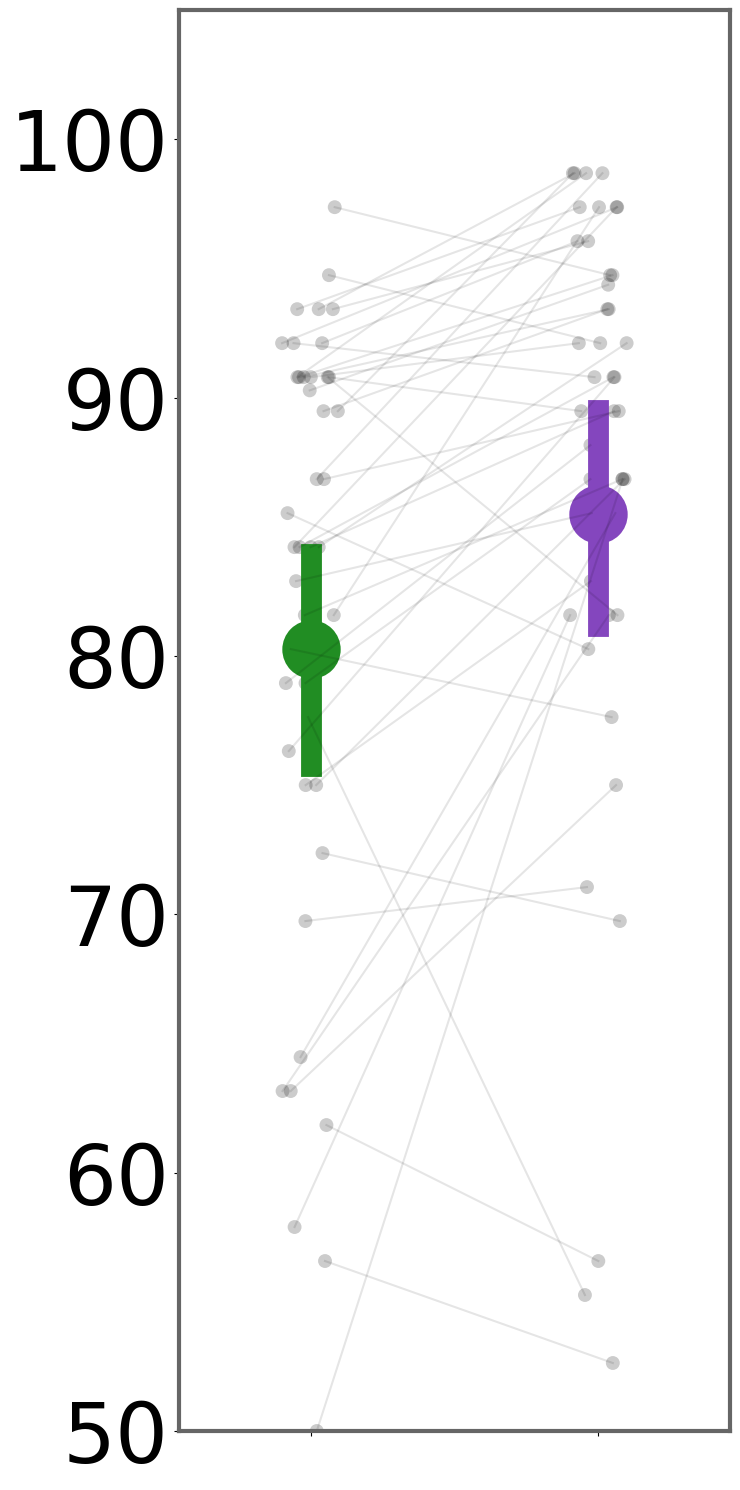

In [ ]:


fs(7.5,15)
fig,ax = plt.subplots()
sns.stripplot(
    data=subjMean[subjMean.distractorType_visVer == 'noDistractor'], 
    x="trlType", y="correctness", hue='trlType',
    hue_order=['visual','verbal'],
    palette=['black'], order = ['visual','verbal'], 
    alpha=.2, legend=False,size=10, zorder = 1,
)

sns.pointplot(
    data=subjMean[subjMean.distractorType_visVer == 'noDistractor'], 
    x="trlType", y="correctness", hue="trlType",
    palette=['black','#218d23',"#8446be"],order = ['visual','verbal'], hue_order=['noDistractor','visual','verbal'],
   legend=False,linestyles='none',errwidth= 15,markersize=40,
)

locs1 = ax.get_children()[0].get_offsets().data
locs2 = ax.get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color="black", alpha=0.1)

plt.ylim(50,105)

plt.tick_params(axis='y', which='major', labelsize=60)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel('',c = 'white')
plt.ylabel('',c = 'white')

plt.xticks(c = 'white');


ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.spines['right'].set_color('#666666')
ax.spines['top'].set_color('#666666')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.margins(y=0.1,x = 0.3)

plt.tight_layout();

C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\2133153254.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\2133153254.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 15}` instead.

  sns.pointplot(


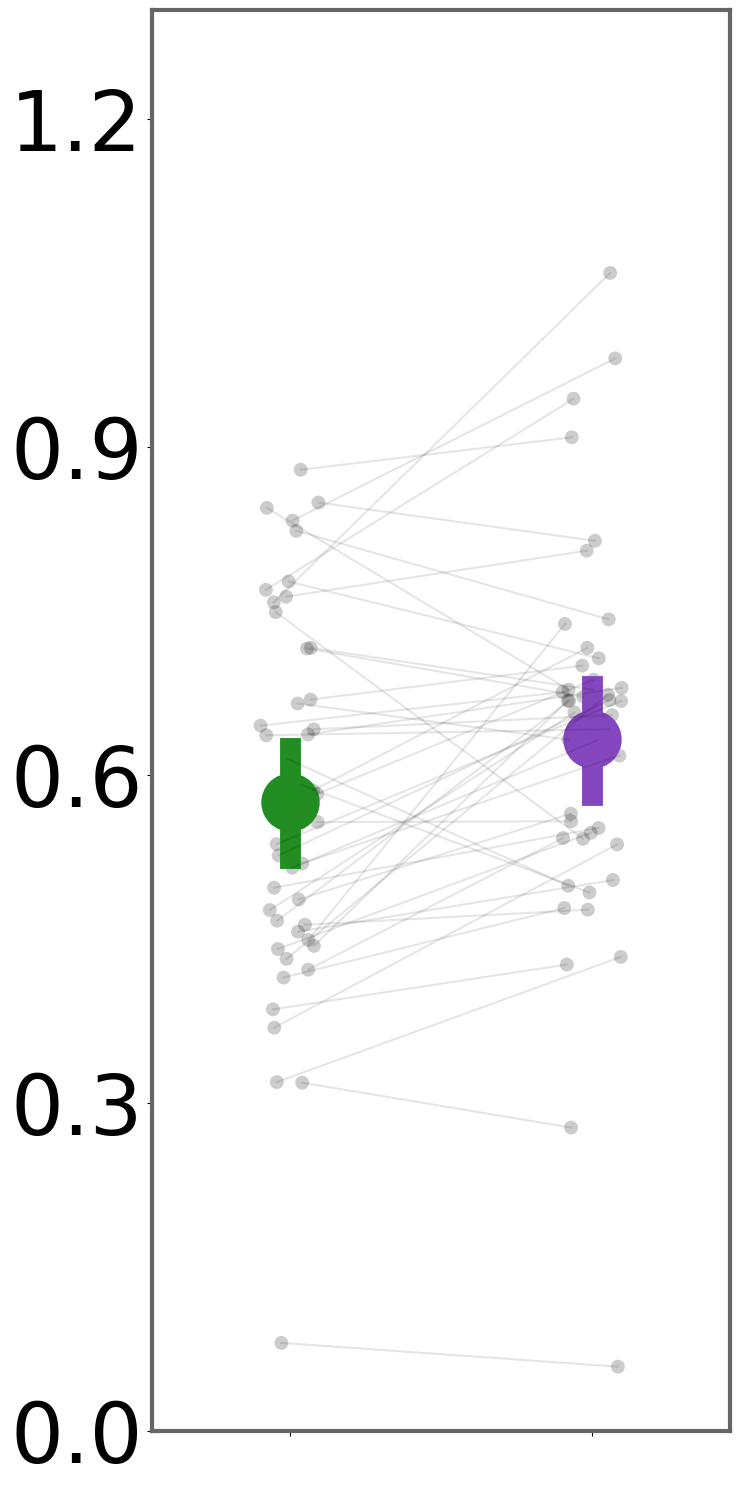

In [ ]:

fs(7.5,15)
fig,ax = plt.subplots()
sns.stripplot(
    data=subjMean[subjMean.distractorType_visVer == 'noDistractor'], 
    x="trlType", y="logRT", hue='trlType',
    hue_order=['visual','verbal'],
    palette=['black'], order = ['visual','verbal'], 
    alpha=.2, legend=False,size=10, zorder = 1,
)

sns.pointplot(
    data=subjMean[subjMean.distractorType_visVer == 'noDistractor'], 
    x="trlType", y="logRT", hue="trlType",
    palette=['black','#218d23',"#8446be"],order = ['visual','verbal'], hue_order=['noDistractor','visual','verbal'],
   legend=False,linestyles='none',errwidth= 15,markersize=40,
)

locs1 = ax.get_children()[0].get_offsets().data
locs2 = ax.get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color="black", alpha=0.1)


plt.tick_params(axis='y', which='major', labelsize=60)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(.3))
plt.xlabel('',c = 'white')
plt.ylabel('',c = 'white')

plt.xticks(c = 'white');

plt.ylim(0,1.3)

ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.spines['right'].set_color('#666666')
ax.spines['top'].set_color('#666666')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.margins(y=0.1,x = 0.3)

plt.tight_layout();

In [38]:
psyFull.loc[psyFull['rsp'] == 'unrelatedFoil','rsp'] = 'unrelateItemFoil'
psyFull.loc[psyFull['rsp'] == 'unrelateItemFoil','rsp'] = 'unrelatedItem'
psyFull.loc[psyFull['rsp'] == 'uncuedFoil','rsp'] = 'uncuedItemFoil'
psyFull.loc[psyFull['rsp'] == 'distractor','rsp'] = 'unrelatedItem'
psyFull.loc[psyFull['rsp'] == 'distractorFoil','rsp'] = 'unrelatedItem'

errTypes = ['cuedItemFoil','uncuedItem','unrelatedItem','uncuedItemFoil']

In [39]:
df = psyFull[(psyFull.correctness == 0) & (psyFull.distractorType == 'noDistractor')][['participant','trlType',
                                                'rsp','correctness']]
errSubtype = df.groupby(['participant','trlType','rsp'], as_index=False).size()


all_combinations = pd.MultiIndex.from_product([df['participant'].unique(), df['trlType'].unique(),errTypes], names=['participant', 'trlType','rsp'])
errSubtype = errSubtype.set_index(['participant', 'trlType','rsp']).reindex(all_combinations, fill_value=0).reset_index()

qq = df.groupby(['participant','trlType']).size().reset_index()
errSubtype = errSubtype.merge(qq, how='left')
errSubtype.rename(columns={0:'thisSubCondErr'},inplace=True)
errSubtype['perc'] = errSubtype['size']*100/errSubtype.thisSubCondErr

In [62]:
test_items = ['cuedItemFoil','uncuedItem','unrelatedItem','uncuedItemFoil',]

for test_item in test_items:
    visual_perc = errSubtype[(errSubtype.rsp == test_item) & (errSubtype.trlType == 'visual')].perc
    verbal_perc = errSubtype[(errSubtype.rsp == test_item) & (errSubtype.trlType == 'verbal')].perc
    
    ttest_result = stats.ttest_rel(
        visual_perc.reset_index(drop=True), 
        verbal_perc.reset_index(drop=True), 
        nan_policy='omit'
    )
    cohen_d_value = cohenD(visual_perc, verbal_perc)

    t_value = ttest_result.statistic
    bf = pg.bayesfactor_ttest(t=t_value, nx=len(visual_perc), ny=len(verbal_perc))
    
    print(f'{test_item}: t={ttest_result.statistic:.3f}, p={ttest_result.pvalue:.3f}')
    print(f'  cohen d: {cohen_d_value:.3f}\n')
    print(f'Bayes Factor: {bf:.3f}')

cuedItemFoil: t=6.718, p=0.000
  cohen d: 1.294

Bayes Factor: 4602374.913
uncuedItem: t=-3.831, p=0.000
  cohen d: -0.795

Bayes Factor: 102.045
unrelatedItem: t=-4.461, p=0.000
  cohen d: -0.913

Bayes Factor: 770.777
uncuedItemFoil: t=1.963, p=0.056
  cohen d: 0.377

Bayes Factor: 1.188


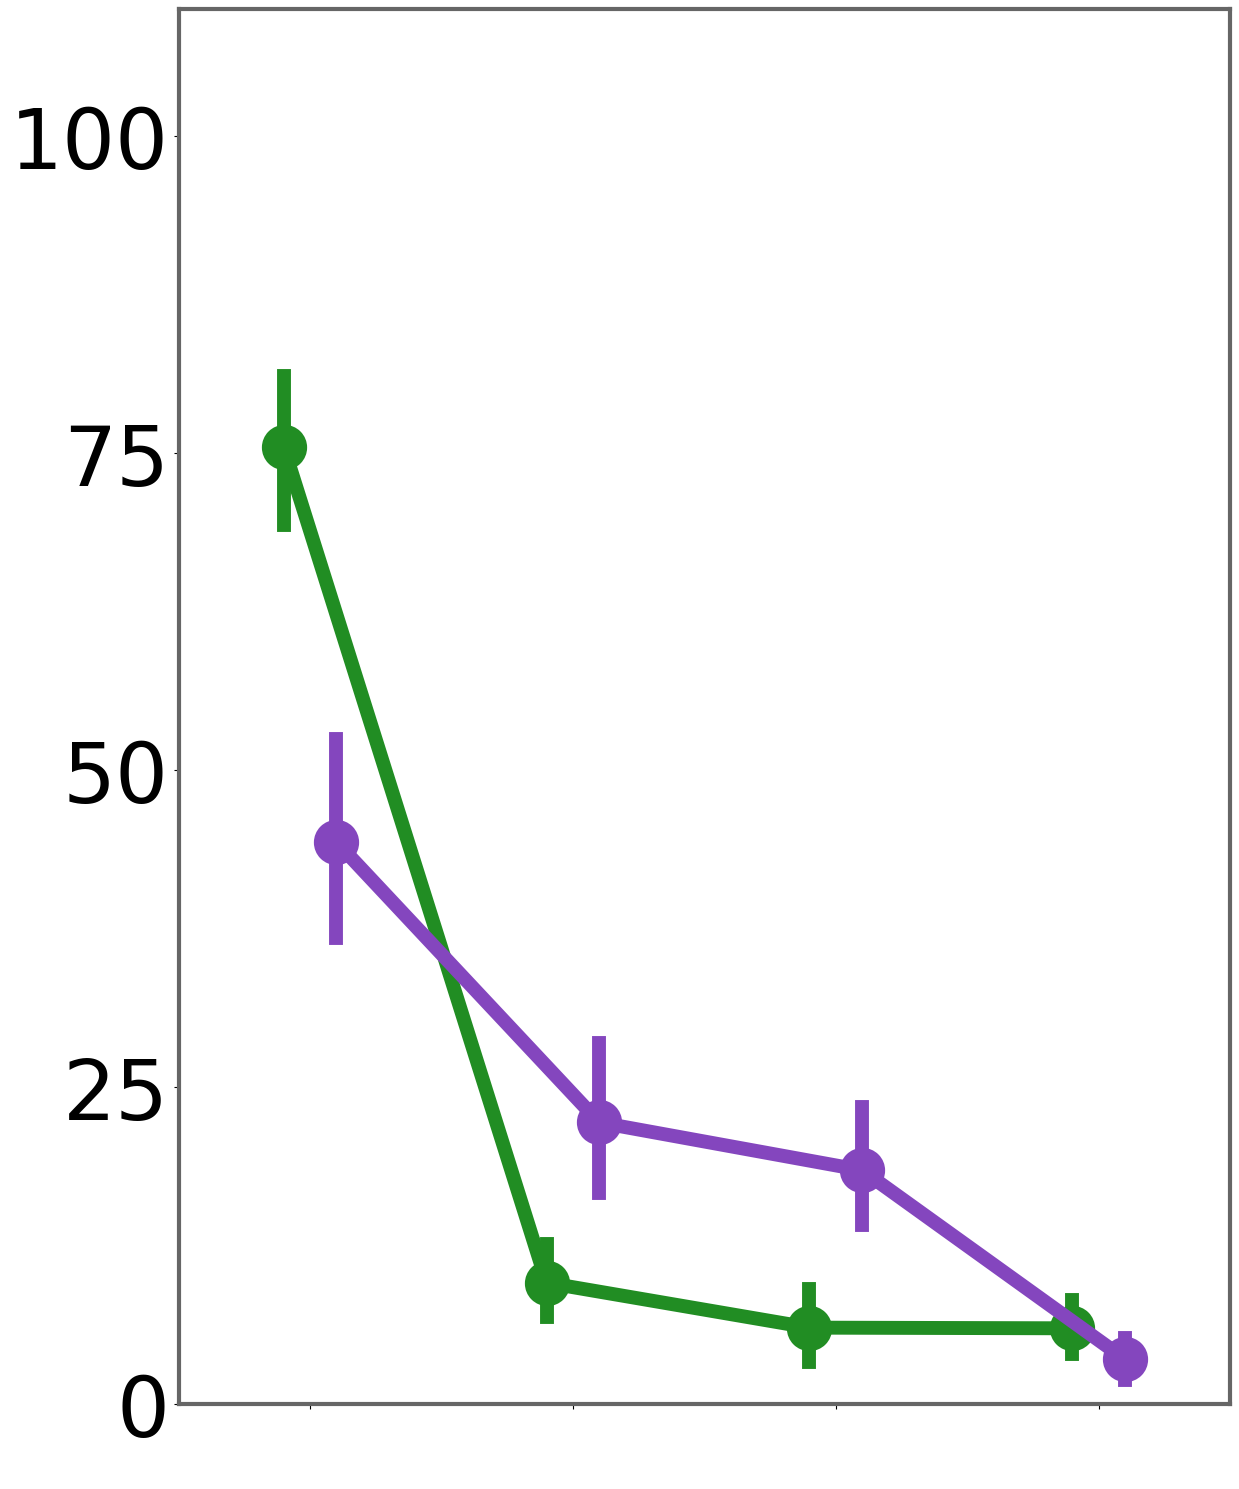

In [63]:
fig, ax = plt.subplots(figsize = (12.5,15))
sns.pointplot(
    data = errSubtype.reset_index(), dodge = 0.2,linewidth = 10,legend=False,
    x = 'rsp', y = 'perc', order= ['cuedItemFoil','uncuedItem','unrelatedItem','uncuedItemFoil'],
    hue = 'trlType', hue_order=['visual','verbal'], palette=["#8446be","#218d23"][::-1],
)
plt.xticks(rotation = 30);
plt.ylim(0,110)
plt.tick_params(axis='y', which='major', labelsize=60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(25))
plt.xlabel('',c = 'white')
plt.ylabel('',c = 'white')

plt.xticks(c = 'white');

ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.spines['right'].set_color('#666666')
ax.spines['top'].set_color('#666666')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
plt.tight_layout()

# Figure 1F

In [49]:
subjMean = psyFull.groupby(['participant','trlType','distractorType']).mean(numeric_only=True).reset_index()

pg.rm_anova(data = subjMean[subjMean.distractorType != 'noDistractor'], dv = 'correctness',
    within= ['trlType','distractorType'], subject='participant',
    effsize = 'np2')[['Source','ddof1','ddof2','F','p-unc','np2']].round(3)

c:\Users\yud070.AD\.conda\envs\yueyingKiyonagaLab\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\yud070.AD\.conda\envs\yueyingKiyonagaLab\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,ddof1,ddof2,F,p-unc,np2
0,trlType,1,43,7.349,0.010,0.146
1,distractorType,1,43,4.066,0.050,0.086
2,trlType * distractorType,1,43,0.760,0.388,0.017


In [65]:
#visualize the mean effect of distractor type
subjMean = psyFull.groupby(['participant','distractorType']).mean(numeric_only=True).reset_index()
subjMean['correctness'] = subjMean['correctness']*100

In [69]:
same = subjMean[subjMean.distractorType == 'congruent'].correctness
different = subjMean[subjMean.distractorType == 'incongruent'].correctness

ttest_result = stats.ttest_rel(same, different, nan_policy='omit')
bf = pg.bayesfactor_ttest(t=t_value, nx=len(same), ny=len(different))

print(f'same vs different distractor domain: t={t_value:.3f}, p={ttest_result.pvalue:.3f}')
print(f'Bayes Factor: {bf:.3f}')


same vs different distractor domain: t=1.963, p=0.050
Bayes Factor: 1.188


C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1113953551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1113953551.py:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(
C:\Users\yud070.AD\AppData\Local\Temp\ipykernel_14896\1113953551.py:12: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 15}` instead.

  f = sns.pointplot(


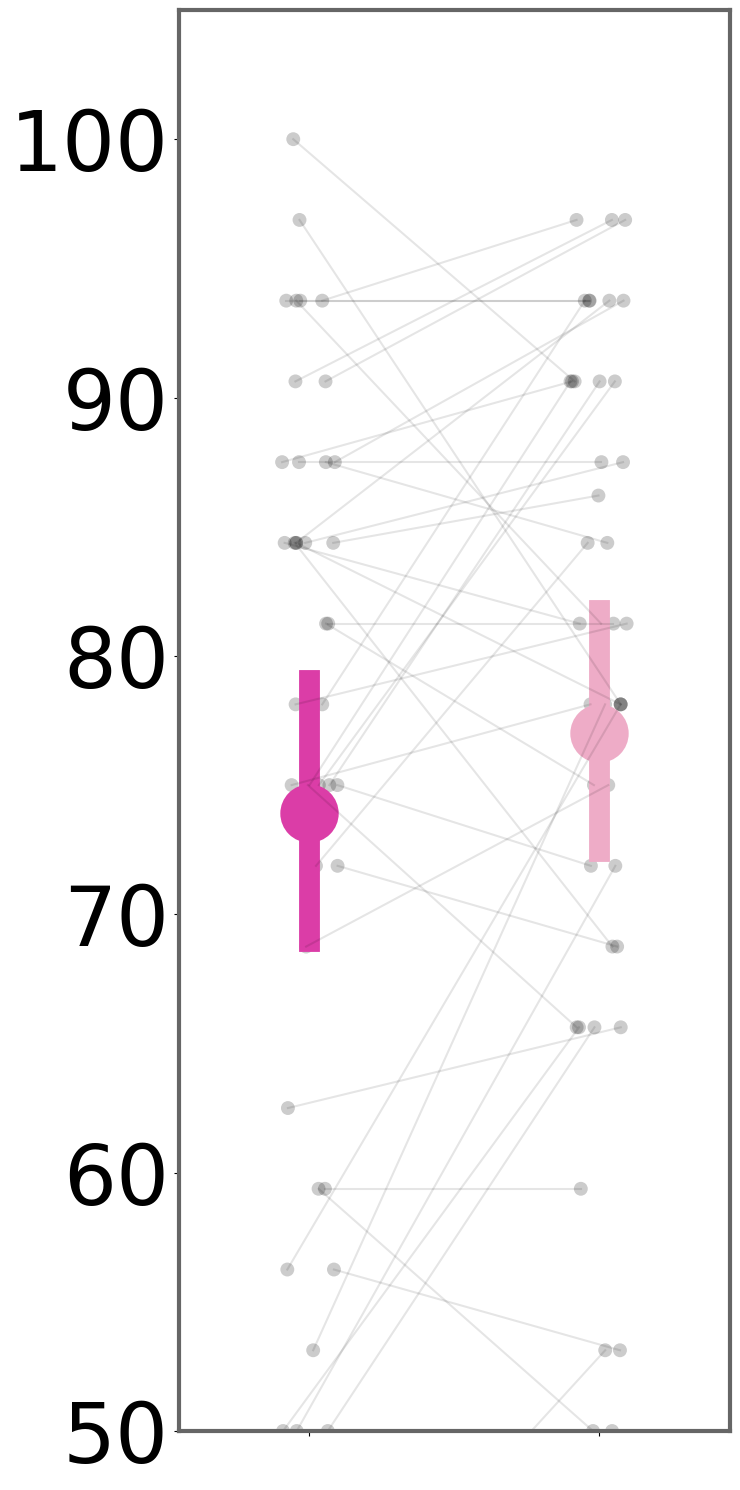

In [70]:


fs(7.5,15)
fig,ax = plt.subplots()

sns.stripplot(
    data=subjMean[subjMean.distractorType != 'noDistractor'], 
     x ="distractorType", y="correctness",
    palette=['black'], order = ['congruent','incongruent'], 
    alpha=.2, legend=False,size=10, zorder = 1,
)


f = sns.pointplot(
    data=subjMean[subjMean.distractorType != 'noDistractor'], 
    x ="distractorType", y="correctness", hue ="distractorType",
    palette=["#DB3DA7","#eeacc7"],order = ['congruent','incongruent'], hue_order=['congruent','incongruent'],
   legend=False,linestyles='none',errwidth= 15,markersize=40, 
)

locs1 = ax.get_children()[0].get_offsets().data
locs2 = ax.get_children()[1].get_offsets().data

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color="black", alpha=0.1)
plt.ylim(50,105)

plt.tick_params(axis='y', which='major', labelsize=60)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xlabel('',c = 'white')
plt.ylabel('',c = 'white')

plt.xticks(c = 'white');


ax.spines['left'].set_color('#666666')
ax.spines['bottom'].set_color('#666666')
ax.spines['right'].set_color('#666666')
ax.spines['top'].set_color('#666666')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.margins(y=0.1,x = 0.3)

plt.tight_layout()